In [2]:
import pandas as pd

# Загрузка данных
file_path = 'ecommerce_clickstream_transactions.csv'
df = pd.read_csv(file_path)

# Просмотр первых строк данных
df.head()

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN


In [3]:
# Удаление строк, где отсутствуют и Amount, и Outcome
df_cleaned = df.dropna(subset=['Amount', 'Outcome'], how='all')

# Заполнение пропусков в столбце ProductID значением 'unknown'
df_cleaned['ProductID'].fillna('unknown', inplace=True)

# Проверка данных после очистки
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 15 to 74815
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     10682 non-null  int64  
 1   SessionID  10682 non-null  int64  
 2   Timestamp  10682 non-null  object 
 3   EventType  10682 non-null  object 
 4   ProductID  10682 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 667.6+ KB


/var/folders/1w/t4syydy93jd0s8jnnjm9m8ph0000gn/T/ipykernel_36178/3381982134.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['ProductID'].fillna('unknown', inplace=True)
/var/folders/1w/t4syydy93jd0s8jnnjm9m8ph0000gn/T/ipykernel_36178/3381982134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ProductID'].fillna('u

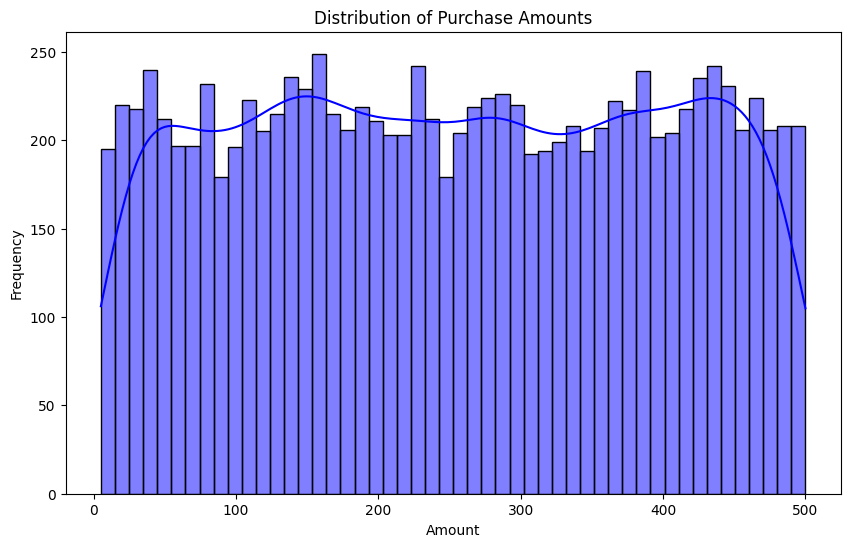

/var/folders/1w/t4syydy93jd0s8jnnjm9m8ph0000gn/T/ipykernel_36178/3993743957.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='EventType', order=df_cleaned['EventType'].value_counts().index, palette='Set2')


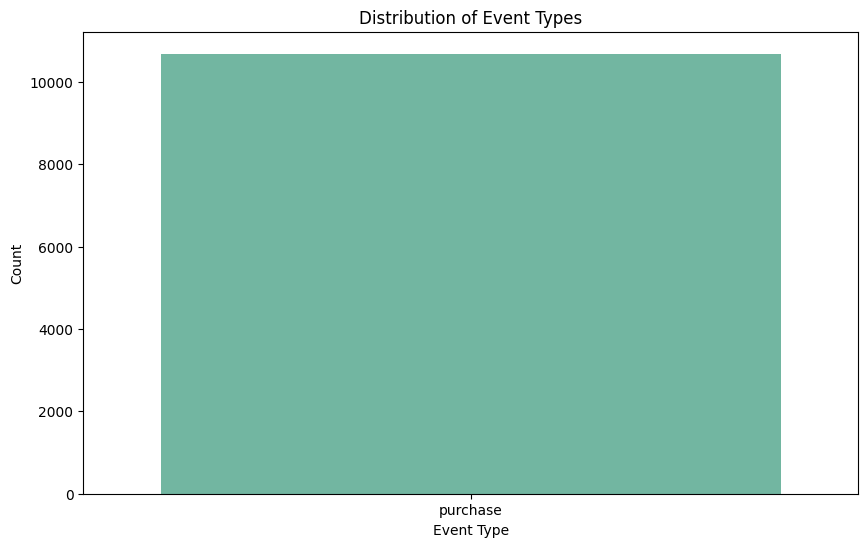

/var/folders/1w/t4syydy93jd0s8jnnjm9m8ph0000gn/T/ipykernel_36178/3993743957.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='EventType', y='Amount', palette='Set1')


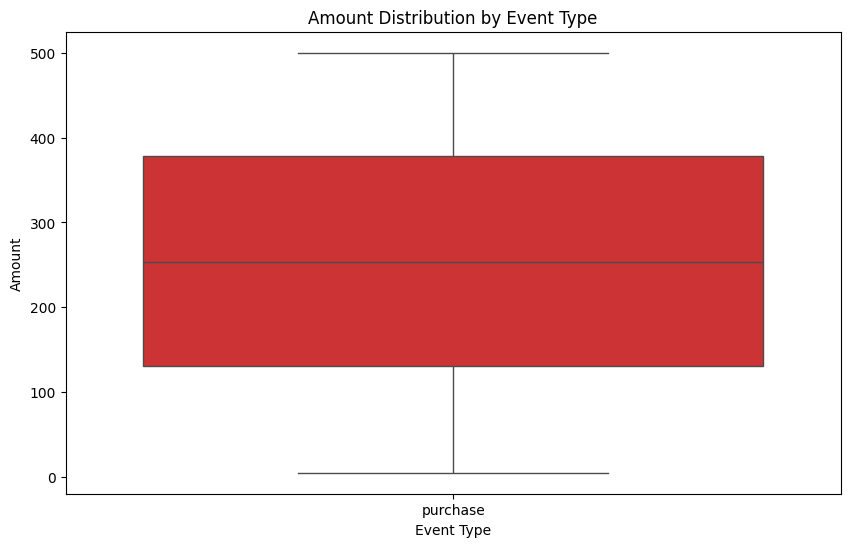

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма распределения суммы покупок
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Распределение типов событий
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='EventType', order=df_cleaned['EventType'].value_counts().index, palette='Set2')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

# Boxplot суммы по типам событий
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='EventType', y='Amount', palette='Set1')
plt.title('Amount Distribution by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Amount')
plt.show()


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Выбор числовых признаков для PCA
df_for_pca = df_cleaned[['Amount']]

# Масштабирование данных перед PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_for_pca)

# Применение PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(df_scaled)

# Доля объясненной дисперсии
explained_variance = pca.explained_variance_ratio_
print('Explained Variance:', explained_variance)

Explained Variance: [1.]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Подготовка данных для классификации
X = df_cleaned[['Amount']]  # Признаки
y = df_cleaned['Outcome']   # Целевой признак (Outcome)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Прогнозирование
y_pred = clf.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Обучение модели Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозирование
rf_pred = rf_model.predict(X_test)

# Оценка производительности модели
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy:', rf_accuracy)

# Подробный отчет о классификации (precision, recall, f1-score)
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

    purchase       1.00      1.00      1.00      3205

    accuracy                           1.00      3205
   macro avg       1.00      1.00      1.00      3205
weighted avg       1.00      1.00      1.00      3205



In [8]:
from sklearn.svm import SVC

# Обучение модели SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Прогнозирование
svm_pred = svm_model.predict(X_test)

# Оценка производительности модели
svm_accuracy = accuracy_score(y_test, svm_pred)
print('SVM Accuracy:', svm_accuracy)

# Подробный отчет о классификации
print('SVM Classification Report:')
print(classification_report(y_test, svm_pred))

ValueError: The number of classes has to be greater than one; got 1 class

In [9]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация для Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print('Random Forest Cross-Validation Scores:', rf_cv_scores)
print('Random Forest Average CV Accuracy:', rf_cv_scores.mean())

# Кросс-валидация для SVM
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)
print('SVM Cross-Validation Scores:', svm_cv_scores)
print('SVM Average CV Accuracy:', svm_cv_scores.mean())

Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest Average CV Accuracy: 1.0


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/asanbay/PycharmProjects/data_mining/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/asanbay/PycharmProjects/data_mining/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/asanbay/PycharmProjects/data_mining/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/asanbay/PycharmProjects/data_mining/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py", line 742, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class
